<a href="https://colab.research.google.com/github/sebfre98/chatbotAprendizajeLenguajes1.0.2/blob/main/prueba_chatbot_del_visual_1_0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#El chatbot realizado tiene como objetivo interactuar con el usuario y brindarle tutoriales respecto a lenguajes de programacion de ahi se deriva el tema que se escoja, una vez el usuario le escriba al chatbot.

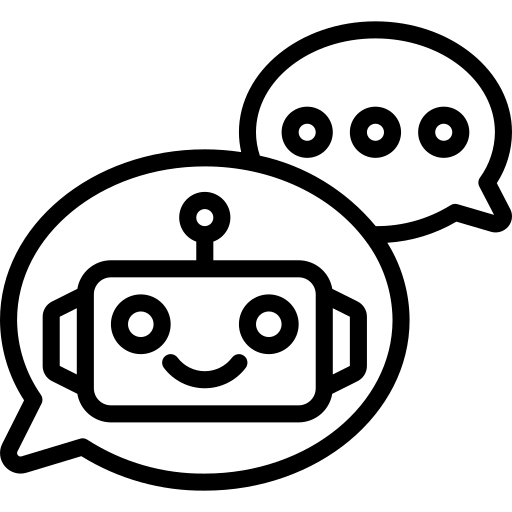
```
Ejemplo de fucionamiento:
Usuario:  haber enseñame javascript
1/1 [==============================] - 0s 20ms/step
Chatbot #6 (^_−):Aqui te proporciono tutoriales con los cuales puede empezar a aprender javascript:
 Aprende Javascript: https://www.aprendejavascript.dev/

```
Archivo con los datos a entrenar y para ser utilizados en la prediccion:
https://drive.google.com/file/d/1hQ6DI0vdvlF10hFNWUxNNxw_0ThLDHOG/view?usp=drive_link




```

```







In [1]:
#importar json con el tema que utilizara el chatbot
import io
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving intentsconv1.0.4.json to intentsconv1.0.4.json


In [ ]:
#Libreria de tensorflow necesaria (en caso de no tenerla)
#!pip install tensorflow

In [2]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [11]:
!pip install colorama

In [12]:
!sudo pip3 install keras

In [13]:
#Importar librerias necesarias
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from colorama import Fore, Back, Style

import json
import pickle
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential, load_model
from keras.optimizers import SGD
#from tensorflow.keras import Sequential
#from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers.legacy import SGD


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
#Lematizador para llevar las palaabras a su forma base

lemmatizer = WordNetLemmatizer()
words = []
classes = []
documents = []
ignore_words = ['?', '!', "," ,"."]
#importar el set de datos que vallamos a usar
data_file = open('intentsconv1.0.4.json').read()
intents = json.loads(data_file)
print(intents)

{'intents': [{'tag': 'saludando', 'patterns': ['Hola a todos', 'Como estas', 'Hey', 'Hola', 'como vas', 'Buenas tardes', 'Buenos dias', 'Buenas noches'], 'responses': ['Hola !, bienvenido, ¿en que te puedo ayudar? ', '¿Como estas?, ¿en que te puedo ayudar?'], 'context': ['']}, {'tag': 'hasta luego', 'patterns': ['Adios', 'chao', 'Nos vemos luego', 'Que estes bien, me voy', 'Me gusto chatear contigo, adios', 'hasta luego', 'Nos vemos la proxima ocacion'], 'responses': ['Hasta luego! que tengas un buen dia (^_−)'], 'context': ['']}, {'tag': 'nombre', 'patterns': ['como es tu nombre', 'como se llama', 'cual es su nombre', 'cual es tu nombre'], 'responses': ['Este es el chatbot del cipas #6 (^_−)', 'Mi nombre es chatbot #6 (^_−)'], 'context': ['']}, {'tag': 'descripcion', 'patterns': ['que hace este chatbot', 'cual es la funcion de este chatbot', 'para que sirve este chatbot', 'ayudame chatbot', 'describe el chatbot', 'menu del chatbot'], 'responses': ['Envio tutoriales para que aprendas a

In [15]:
# intents: tipos de conversacion
# patterns: posibles interacciones del usuario
for intent in intents['intents']:
    for pattern in intent['patterns']:

        # tokenizar palabras
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        # agregar los documentos a la matriz
        documents.append((w, intent['tag']))

        # Agregar clases a nuestra lista de clases
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]

pickle.dump(words, open('words.pkl','wb'))
pickle.dump(classes, open('classes.pkl','wb'))


In [16]:
# Entrenamiento de la red
training = []
output_empty = [0] * len(classes)
for doc in documents:
    # bag: maleta de palabras
    bag = []
    # lista de tokens
    pattern_words = doc[0]
    # lemmatizacion del token
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # Si la palabra coincide ingreso 1 de lo contrario 0
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

training = np.array(training)
# Creacion del set de entrenamiento x, y
train_x = list(training[:,0])
train_y = list(training[:,1])


<ipython-input-16-e1d5bba3b34d>:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training = np.array(training)


In [17]:
# Creacion del modelo
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#Entrenar y guardar el modelo
hist = model.fit(np.array(train_x), np.array(train_y), epochs=800, batch_size=5, verbose=1)
model.save('chatbot_model.h5', hist)

print("modelo creado")

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/800
16/16 [==============================] - 2s 15ms/step - loss: 2.7640 - accuracy: 0.0886
Epoch 2/800
16/16 [==============================] - 0s 10ms/step - loss: 2.7004 - accuracy: 0.1139
Epoch 3/800
16/16 [==============================] - 0s 7ms/step - loss: 2.4604 - accuracy: 0.3038
Epoch 4/800
16/16 [==============================] - 0s 13ms/step - loss: 2.3238 - accuracy: 0.3418
Epoch 5/800
16/16 [==============================] - 0s 11ms/step - loss: 2.0315 - accuracy: 0.3924
Epoch 6/800
16/16 [==============================] - 0s 14ms/step - loss: 2.0298 - accuracy: 0.4304
Epoch 7/800
16/16 [==============================] - 0s 11ms/step - loss: 1.7684 - accuracy: 0.4937
Epoch 8/800
16/16 [==============================] - 0s 16ms/step - loss: 1.6300 - accuracy: 0.4937
Epoch 9/800
16/16 [==============================] - 0s 9ms/step - loss: 1.4494 - accuracy: 0.5696
Epoch 10/800
16/16 [==============================] - 0s 8ms/step - loss: 1.4200 - accuracy: 0.6076
Ep

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
#Prediccion de los datos por el modelo entrenado
import nltk, json, random, pickle
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import pickle
import numpy as np
from keras.models import load_model
#cargar datos del modelo entrenado
model = load_model('chatbot_model.h5')
#importar el set de datos que vallamos a usar
intents = json.loads(open('intentsconv1.0.4.json').read())
words = pickle.load(open('words.pkl','rb'))
classes = pickle.load(open('classes.pkl','rb'))


In [30]:
from colorama import Fore, Back, Style
# preprocesamiento de entrada de usuario
def clean_up_sentence(sentence):
    sentence_words = nltk.word_tokenize(sentence)
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words

# creacion maleta de palabras
def bow(sentence, words, show_details=True):
    sentence_words = clean_up_sentence(sentence)
    bag = [0]*len(words)
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s:
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))

def calcola_pred(sentence, model):
    p = bow(sentence, words,show_details=False)
    res = model.predict(np.array([p]))[0]
    ERROR_THRESHOLD = 0.25
    results = [[i,r] for i,r in enumerate(res) if r>ERROR_THRESHOLD]
    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    return return_list

def getRisposta(ints, intents_json):
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if(i['tag']== tag):
            result = random.choice(i['responses'])
            break
    return result

def inizia(msg):
    ints = calcola_pred(msg, model)
    res = getRisposta(ints, intents)
    return res

print(Fore.LIGHTRED_EX+"Bienvenido! para detener el programa, escriba " "salir"+Style.BRIGHT)

utente = ''

#while utente != 'salir':
#utente = input("Ingrese un valor o 'salir' para terminar: ")
while utente.lower() != 'salir':
    utente = str(input(Fore.LIGHTRED_EX+"Usuario: """+Fore.BLUE))
    res = inizia(utente)
    print(Fore.LIGHTRED_EX+'Chatbot #6 (^_−):'+Fore.BLUE + res)
print()
print(Fore.BLACK+"La consulta ha terminado..")

Bienvenido! para detener el programa, escriba salir
Usuario: hola sr bot
1/1 [==============================] - 0s 20ms/step
Chatbot #6 (^_−):Hola !, bienvenido, ¿en que te puedo ayudar? 
Usuario: q haces
1/1 [==============================] - 0s 18ms/step
Chatbot #6 (^_−):Lo siento, pero no puedo entenderte.. se más especifico porfavor
Usuario: bueno entonces enseñame algun lenguaje de programacion
1/1 [==============================] - 0s 19ms/step
Chatbot #6 (^_−):Aqui te proporciono tutoriales con los cuales puede empezar a aprender a programar desde cero: 
 Articulo aprender a programar desde cero: ¿Por dónde empezar?: https://www.aluracursos.com/blog/aprender-a-programar-desde-cero-donde-empezar
Usuario: bien
1/1 [==============================] - 0s 20ms/step
Chatbot #6 (^_−):Hasta luego! que tengas un buen dia (^_−)
Usuario: y java lo sabes?
1/1 [==============================] - 0s 20ms/step
Chatbot #6 (^_−):Aqui te proporciono tutoriales con los cuales puede empezar a aprende



#**Webgrafia:**
__________________________________________________________________________
Fundamentos de java tercer edicion (2007). Herbert Shild. Recuperado 19 de Julio de 2023, desde https://maycolmo.github.io/pe/java.pdf
__________________________________________________________________________
Aprende a programar en Python. Mariano Laca. Recuperado 19 de Julio de 2023, desde https://pythones.net/
__________________________________________________________________________
Curso gratis de programacion en c#. Mi aula facil. Recuperado 19 de Julio de 2023, desde https://www.aulafacil.com/cursos/programacion/en-c-t1589
__________________________________________________________________________
Curso de COBOL totalmente desde cero. Programacion facil. Recuperado 19 de Julio de 2023, desde https://www.programacionfacil.org/cursos/cobol/cobol_index.html
__________________________________________________________________________
Aprende Javascript. aprendejavascript. Recuperado 19 de Julio de 2023, desde https://www.aprendejavascript.dev/
__________________________________________________________________________
Tutorial básico del programador web: HTML desde cero. aprenderaprogramar.com. Recuperado 19 de Julio de 2023, desde https://aprenderaprogramar.com/index.php?Itemid=192=69=com_content=category

__________________________________________________________________________
Aprende a Programar con Ruby. rubysur. Recuperado 19 de Julio de 2023, desde
http://rubysur.org/aprende.a.programar/index.html
__________________________________________________________________________
Curso SQL desde cero. deletesql.com. Recuperado 19 de Julio de 2023, desde http://deletesql.com/viewforum.php?f=5
__________________________________________________________________________
Aprender a programar desde cero: ¿Por dónde empezar?. Priscila Sousa. Recuperado 19 de Julio de 2023, desde
https://www.aluracursos.com/blog/aprender-a-programar-desde-cero-donde-empezar